
## K-Means En Base De Arrestos
### Cargamos Los Datos De Arresto

In [0]:
# Cargar el archivo CSV en un DataFrame de Spark
file_path = "dbfs:/FileStore/shared_uploads/mauri07rodriguezcordoba@gmail.com/arrestos_limpio.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)
display(data)

ARREST_DATE OFNS_DESC LAW_CAT_CD ARREST_BORO JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE X_COORD_CD Y_COORD_CD Latitude Longitude New Georeferenced Column 2024-01-10 Delitos contra la propiedad F Manhattan Patrol < 18 M Black 996342 236149 40.814845 -73.956312 POINT (-73.956312 40.814845) 2024-01-02 Delitos contra las personas F Brooklyn Patrol 18 - 64 M Hispanic 1003509 185018 40.6744956865259 -73.9305713255961 POINT (-73.9305713255961 40.6744956865259) 2024-01-03 Delitos contra las personas M Queens Patrol 65+ F White 1026836 180689 40.662526 -73.846499 POINT (-73.846499 40.662526) 2024-01-19 Delitos contra la seguridad pública M Bronx Patrol 18 - 64 M Black 1027430 251104 40.855793 -73.843908 POINT (-73.843908 40.855793) 2024-01-11 Delitos contra las personas F Brooklyn Housing 18 - 64 F Black 1002457 192292 40.694456 -73.934343 POINT (-73.934343 40.694456) 2024-02-01 Delitos contra las personas F Queens Patrol 18 - 64 M Black 1046315 187088 40.6799807384666 -73.7762339071953 POINT (-73.7762339071953 40.6799807384666) 2024-01-19 Delitos contra las personas M Manhattan Patrol 18 - 64 M Black 984134 207984 40.737547 -74.000415 POINT (-74.000415 40.737547) 2024-01-30 Delitos contra las personas M Manhattan Patrol 18 - 64 M Black 996014 236126 40.81478 -73.957499 POINT (-73.957499 40.81478) 2024-01-31 Delitos contra las personas F Bronx Patrol 18 - 64 M Black 1013037 236657 40.8162058439227 -73.8960011932583 POINT (-73.8960011932583 40.8162058439227) 2024-02-03 Delitos contra las personas F Queens Patrol 18 - 64 M Asian 1030262 191716 40.692773 -73.834076 POINT (-73.834076 40.692773) 2024-01-31 Delitos contra las personas F Brooklyn Patrol 18 - 64 M Black 1005312 190540 40.68964 -73.924051 POINT (-73.924051 40.68964) 2024-01-31 Delitos contra la propiedad F Brooklyn Patrol 18 - 64 M Black 1010576 175628 40.648698 -73.905128 POINT (-73.905128 40.648698) 2024-01-26 Delitos contra la propiedad F Brooklyn Patrol 18 - 64 M Black 1003508 185056 40.674593 -73.930572 POINT (-73.930572 40.674593) 2024-02-07 Delitos contra las personas F Brooklyn Patrol 18 - 64 M White 999507 190206 40.688736 -73.944984 POINT (-73.944984 40.688736) 2024-02-02 Delitos contra las personas M Manhattan Patrol 18 - 64 F White 991040 225092 40.784499 -73.97548 POINT (-73.97548 40.784499) 2024-02-15 Delitos contra las personas M Bronx Patrol 18 - 64 M Black 1021554 261934 40.885545 -73.865086 POINT (-73.865086 40.885545) 2024-02-20 Delitos contra la propiedad F Queens Patrol < 18 M Black 1007694 219656 40.769552 -73.915361 POINT (-73.915361 40.769552) 2024-02-15 Delitos contra las personas F Brooklyn Patrol 18 - 64 F Black 994089 191965 40.693571 -73.964519 POINT (-73.964519 40.693571) 2024-02-19 Delitos contra las personas M Manhattan Patrol 18 - 64 F Black 992253 214996 40.756789 -73.97111 POINT (-73.97111 40.756789) 2024-02-29 Delitos contra las personas F Queens Patrol 18 - 64 M Other 1025401 202586 40.7226409964758 -73.8515418216779 POINT (-73.8515418216779 40.7226409964758) 2024-03-16 Delitos contra las personas M Manhattan Patrol 18 - 64 M Hispanic 988190 215311 40.757656 -73.985776 POINT (-73.985776 40.757656) 2024-03-04 Delitos contra las personas F Bronx Patrol 18 - 64 M Hispanic 1032091 241976 40.8307223277672 -73.8271260588639 POINT (-73.8271260588639 40.8307223277672) 2024-03-18 Delitos contra las personas M Queens Patrol 18 - 64 M Black 1046399 187126 40.680077 -73.775929 POINT (-73.775929 40.680077) 2024-03-06 Delitos contra la administración pública F Manhattan Patrol 18 - 64 M Black 999461 234720 40.810915 -73.94505 POINT (-73.94505 40.810915) 2024-03-18 Delitos contra las personas F Brooklyn Patrol 18 - 64 M Hispanic 1003509 185018 40.6744956865259 -73.9305713255961 POINT (-73.9305713255961 40.6744956865259) 2024-01-10 Delitos contra las personas F Queens Patrol 18 - 64 M Black 1017025 212930 40.75106 -73.881707 POINT (-73.881707 40.75106) 2024-01-08 Delitos contra la propiedad F Manhattan Patrol 18 - 64 M White 984326 203484 40.725195 -73.


### Filtramos por las coordenadas esperadas que pueden delimitar la ciudad de nueva york

In [0]:
from pyspark.sql.functions import col

# Rango esperado para Nueva York
# Latitud: 40.4774 a 40.9176
# Longitud: -74.2591 a -73.7004

# Filtrar datos que están dentro del rango esperado
filtered_df = data.filter((col('Latitude') >= 40.4774) & (col('Latitude') <= 40.9176) & 
                        (col('Longitude') >= -74.2591) & (col('Longitude') <= -73.7004))

# Verificar la cantidad de registros válidos
filtered_df.count()


Out[2]: 62999


### Transformamos las columnas de latitud y longitud en una sola columna de características.

In [0]:
from pyspark.ml.feature import VectorAssembler

# Crear un VectorAssembler para las características de entrada
assembler = VectorAssembler(inputCols=['Latitude', 'Longitude'], outputCol='features')
assembled_data = assembler.transform(filtered_df)



### Pintamos el gráfico del codo con el fin de observar el óptimo

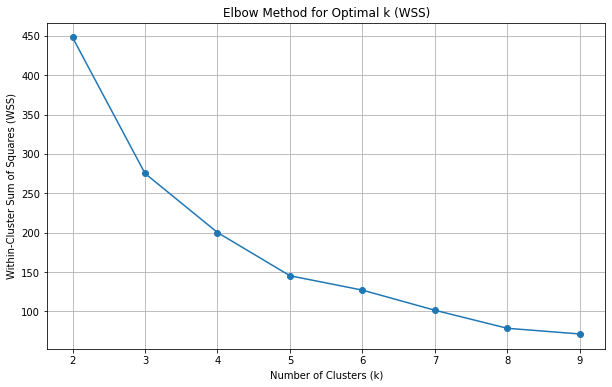

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Lista para almacenar los errores al cuadrado (WSS)
wss = []

# Probar diferentes valores de k
for k in range(2, 10):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(assembled_data)
    
    # Calcular WSS
    wss.append((k, model.summary.trainingCost))

# Convertir la lista a un DataFrame para visualización
wss_df = spark.createDataFrame(wss, ["k", "wss"])

# Convertir a Pandas para la visualización
wss_pd = wss_df.toPandas()

# Graficar los errores al cuadrado (WSS)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(wss_pd['k'], wss_pd['wss'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k (WSS)')
plt.grid(True)
plt.show()



### Aplicamos el algoritmo k-means parametro k=3

+----------------+-----------------+----------+
|        Latitude|        Longitude|prediction|
+----------------+-----------------+----------+
|       40.814845|       -73.956312|         1|
|40.6744956865259|-73.9305713255961|         0|
|       40.662526|       -73.846499|         2|
|       40.855793|       -73.843908|         1|
|       40.694456|       -73.934343|         0|
|40.6799807384666|-73.7762339071953|         2|
|       40.737547|       -74.000415|         0|
|        40.81478|       -73.957499|         1|
|40.8162058439227|-73.8960011932583|         1|
|       40.692773|       -73.834076|         2|
|        40.68964|       -73.924051|         0|
|       40.648698|       -73.905128|         2|
|       40.674593|       -73.930572|         0|
|       40.688736|       -73.944984|         0|
|       40.784499|        -73.97548|         1|
|       40.885545|       -73.865086|         1|
|       40.769552|       -73.915361|         1|
|       40.693571|       -73.964519|    

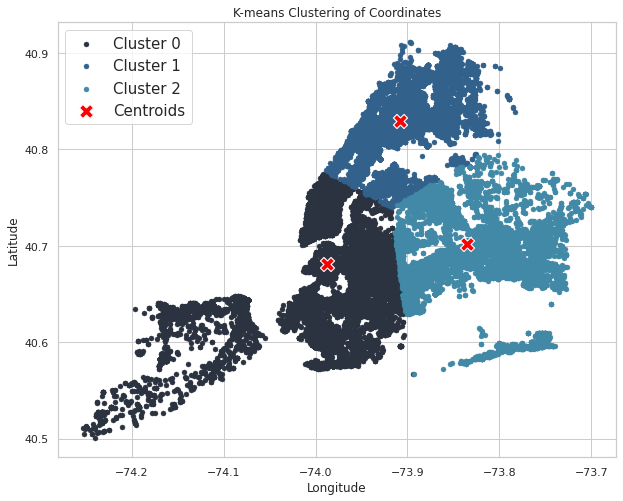

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar y entrenar el modelo K-means
kmeans3 = KMeans().setK(3).setSeed(1).setFeaturesCol("features")
model3 = kmeans3.fit(assembled_data)

# Asignar puntos a clusters
cluster_assignments3 = model3.transform(assembled_data)

# Obtener los centroides
centroids3 = model3.clusterCenters()

# Mostrar los resultados
cluster_assignments3.select('Latitude', 'Longitude', 'prediction').show()

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6']

# Convertir los datos a Pandas para visualización
cluster_assignments_pandas_3 = cluster_assignments3.select('Latitude', 'Longitude', 'prediction').toPandas()

# Crear el gráfico con Seaborn
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for i in range(3):  
    cluster_data3 = cluster_assignments_pandas_3[cluster_assignments_pandas_3['prediction'] == i]
    sns.scatterplot(x='Longitude', y='Latitude', data=cluster_data3, color=colors[i], label=f'Cluster {i}', s=25, edgecolor = None)

# Graficar los centroides
sns.scatterplot(x=[centroid[1] for centroid in centroids3], y=[centroid[0] for centroid in centroids3], color='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(fontsize = '15')
plt.show()


### Algoritmo k-means parametro k=5

+----------------+-----------------+----------+
|        Latitude|        Longitude|prediction|
+----------------+-----------------+----------+
|       40.814845|       -73.956312|         3|
|40.6744956865259|-73.9305713255961|         0|
|       40.662526|       -73.846499|         4|
|       40.855793|       -73.843908|         3|
|       40.694456|       -73.934343|         0|
|40.6799807384666|-73.7762339071953|         4|
|       40.737547|       -74.000415|         1|
|        40.81478|       -73.957499|         3|
|40.8162058439227|-73.8960011932583|         3|
|       40.692773|       -73.834076|         4|
|        40.68964|       -73.924051|         0|
|       40.648698|       -73.905128|         0|
|       40.674593|       -73.930572|         0|
|       40.688736|       -73.944984|         0|
|       40.784499|        -73.97548|         1|
|       40.885545|       -73.865086|         3|
|       40.769552|       -73.915361|         1|
|       40.693571|       -73.964519|    

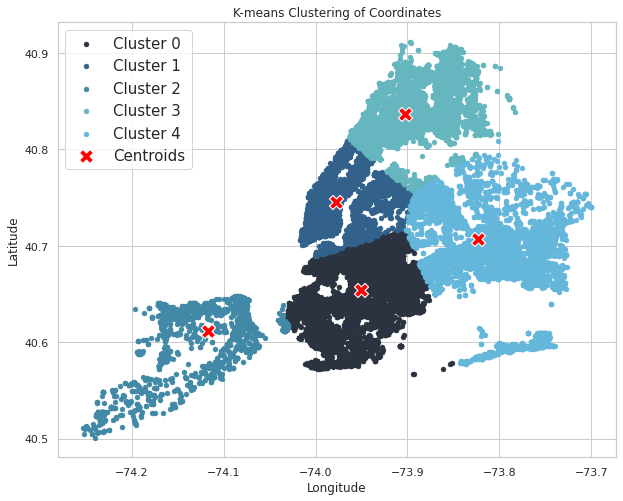

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar y entrenar el modelo K-means
kmeans5 = KMeans().setK(5).setSeed(1).setFeaturesCol("features")
model5 = kmeans5.fit(assembled_data)

# Asignar puntos a clusters
cluster_assignments5 = model5.transform(assembled_data)

# Obtener los centroides
centroids5 = model5.clusterCenters()

# Mostrar los resultados
cluster_assignments5.select('Latitude', 'Longitude', 'prediction').show()

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6', '#65B6BF', '#65B6DB']

# Convertir los datos a Pandas para visualización
cluster_assignments_pandas_5 = cluster_assignments5.select('Latitude', 'Longitude', 'prediction').toPandas()

# Crear el gráfico con Seaborn
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for i in range(5):  
    cluster_data5 = cluster_assignments_pandas_5[cluster_assignments_pandas_5['prediction'] == i]
    sns.scatterplot(x='Longitude', y='Latitude', data=cluster_data5, color=colors[i], label=f'Cluster {i}', s=25, edgecolor = None)

# Graficar los centroides
sns.scatterplot(x=[centroid[1] for centroid in centroids5], y=[centroid[0] for centroid in centroids5], color='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(fontsize = '15')
plt.show()


### Algoritmo k-means parametro k=4, nuestro elegido e ideal

In [0]:
# Configurar y entrenar el modelo K-means
kmeans = KMeans().setK(4).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(assembled_data)


### Asignamos cada punto de datos a uno de los clusters.

In [0]:
# Asignar puntos a clusters
cluster_assignments = model.transform(assembled_data)

# Mostrar los resultados
cluster_assignments.select('Latitude', 'Longitude', 'prediction').show()

# Obtener los centroides
centroids = model.clusterCenters()

# Mostrar los centroides
for idx, centroid in enumerate(centroids):
    print(f"Centroid {idx}: {centroid}")

+----------------+-----------------+----------+
|        Latitude|        Longitude|prediction|
+----------------+-----------------+----------+
|       40.814845|       -73.956312|         1|
|40.6744956865259|-73.9305713255961|         0|
|       40.662526|       -73.846499|         3|
|       40.855793|       -73.843908|         1|
|       40.694456|       -73.934343|         0|
|40.6799807384666|-73.7762339071953|         3|
|       40.737547|       -74.000415|         0|
|        40.81478|       -73.957499|         1|
|40.8162058439227|-73.8960011932583|         1|
|       40.692773|       -73.834076|         3|
|        40.68964|       -73.924051|         0|
|       40.648698|       -73.905128|         0|
|       40.674593|       -73.930572|         0|
|       40.688736|       -73.944984|         0|
|       40.784499|        -73.97548|         1|
|       40.885545|       -73.865086|         1|
|       40.769552|       -73.915361|         1|
|       40.693571|       -73.964519|    


### Visualizamos los resultados del K-Means

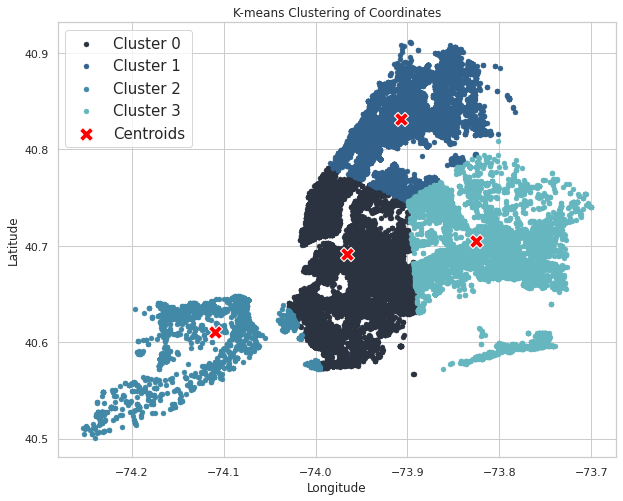

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6', '#65B6BF']

# Convertir los datos a Pandas para visualización
cluster_assignments_pandas = cluster_assignments.select('Latitude', 'Longitude', 'prediction').toPandas()

# Crear el gráfico con Seaborn
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for i in range(4):  
    cluster_data = cluster_assignments_pandas[cluster_assignments_pandas['prediction'] == i]
    sns.scatterplot(x='Longitude', y='Latitude', data=cluster_data, color=colors[i], label=f'Cluster {i}', s=25, edgecolor = None)

# Graficar los centroides
sns.scatterplot(x=[centroid[1] for centroid in centroids], y=[centroid[0] for centroid in centroids], color='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(fontsize = '15')
plt.show()


### Analizamos los tipos de delitos por cada cluster

In [0]:
# Frecuencia de Delitos por Tipo
crime_frequency = cluster_assignments.groupBy("prediction", "OFNS_DESC").count()

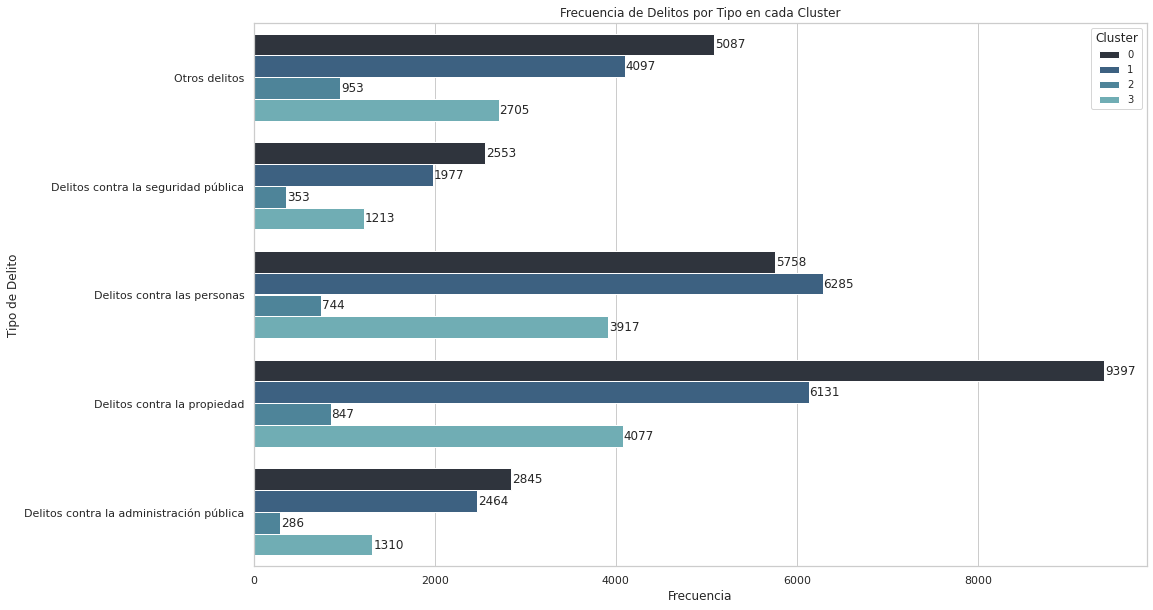

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Frecuencia de Delitos por Tipo
crime_frequency = cluster_assignments.groupBy("prediction", "OFNS_DESC").count()

# Convertir a Pandas DataFrame para facilitar la visualización
crime_frequency_pd = crime_frequency.toPandas()

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6', '#65B6BF']

# Crear gráfica con Seaborn
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Usar barplot con hue para diferenciar los clusters
ax = sns.barplot(x='count', y='OFNS_DESC', hue='prediction', data=crime_frequency_pd, palette=colors)

plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Delito')
plt.title('Frecuencia de Delitos por Tipo en cada Cluster')
plt.legend(title='Cluster', fontsize=10)

# Añadir etiquetas de datos
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, '{:.0f}'.format(width), ha='left', va='center')

plt.show()



### Vemos como se distribuyen los días de las semanas por cluster

<Figure size 1152x720 with 0 Axes>

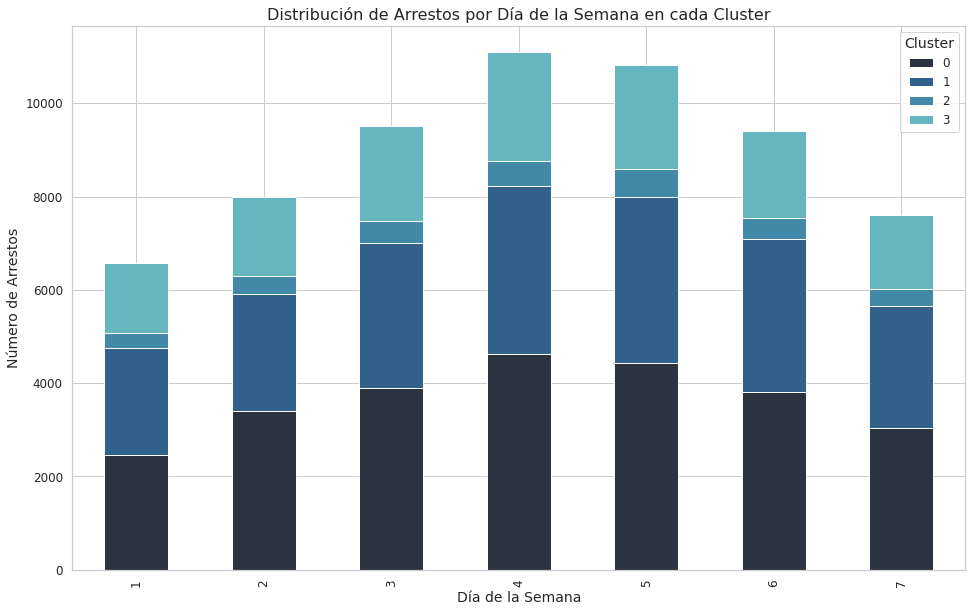

In [0]:
from pyspark.sql.functions import dayofweek

# Extraer el día de la semana de la fecha
cluster_assignments = cluster_assignments.withColumn('ARREST_DAYOFWEEK', dayofweek(col('ARREST_DATE')))

# Frecuencia de Arrestos por Día de la Semana
weekly_distribution = cluster_assignments.groupBy("prediction", "ARREST_DAYOFWEEK").count()

# Convertir a Pandas DataFrame para facilitar la visualización
weekly_distribution_pd = weekly_distribution.toPandas()

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6', '#65B6BF']

# Pivotear la tabla para facilitar la gráfica apilada
weekly_distribution_pivot = weekly_distribution_pd.pivot(index='ARREST_DAYOFWEEK', columns='prediction', values='count').fillna(0)

# Crear gráfica con Seaborn
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Crear gráfica de barras apiladas
ax = weekly_distribution_pivot.plot(kind='bar', stacked=True, color=colors, figsize=(16, 10))

plt.xlabel('Día de la Semana', fontsize=14)
plt.ylabel('Número de Arrestos', fontsize=14)
plt.title('Distribución de Arrestos por Día de la Semana en cada Cluster', fontsize=16)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Observamos la distribución de arrestos por edad en los clusters


### Miramos la distribución de arrestos por sexo


<Figure size 72x720 with 0 Axes>

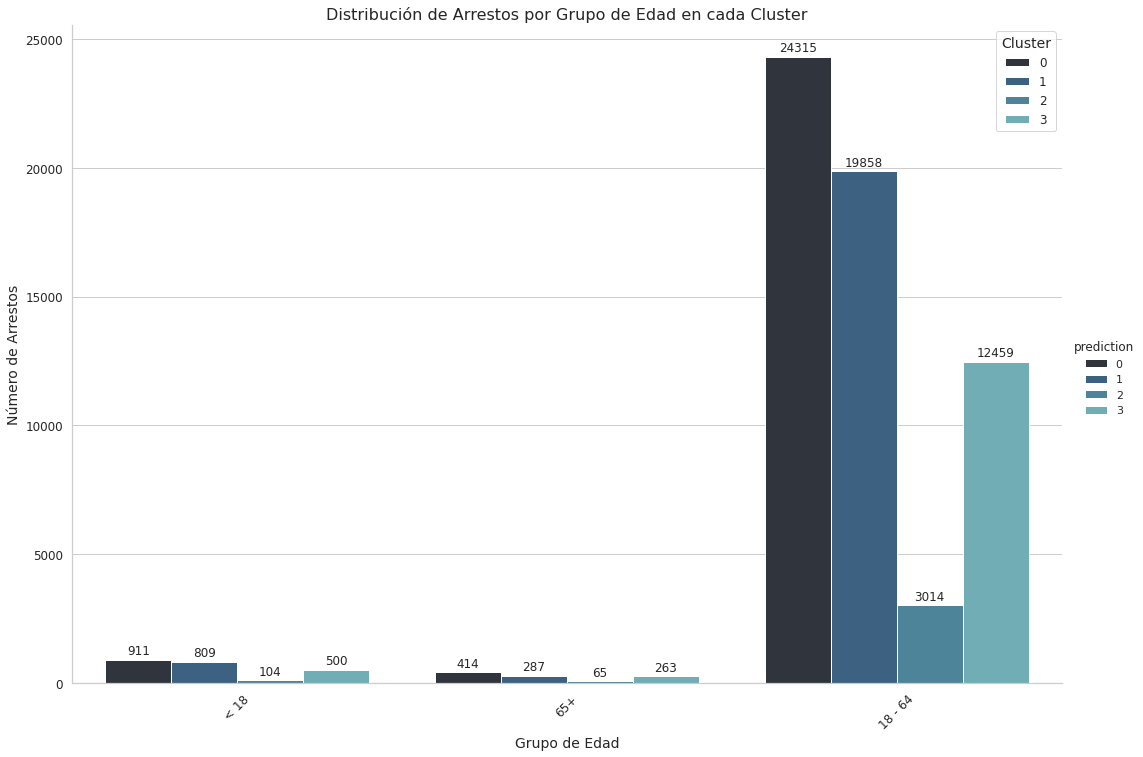

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6', '#65B6BF']

# Agrupar los datos por cluster y edad
age_distribution = cluster_assignments.groupBy("prediction", "AGE_GROUP").count()

# Convertir a Pandas DataFrame para facilitar la visualización
age_distribution_pd = age_distribution.toPandas()

# Crear el gráfico con Seaborn
plt.figure(figsize=(1, 10))
sns.set(style="whitegrid")

# Crear gráfica de barras separadas
bar_plot = sns.catplot(data=age_distribution_pd, kind="bar", x='AGE_GROUP', y='count', hue='prediction', palette=colors, height=10, aspect=1.5)

# Añadir etiquetas de datos
for ax in bar_plot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', 
                   fontsize=12)

plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Número de Arrestos', fontsize=14)
plt.title('Distribución de Arrestos por Grupo de Edad en cada Cluster', fontsize=16)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<Figure size 1080x720 with 0 Axes>

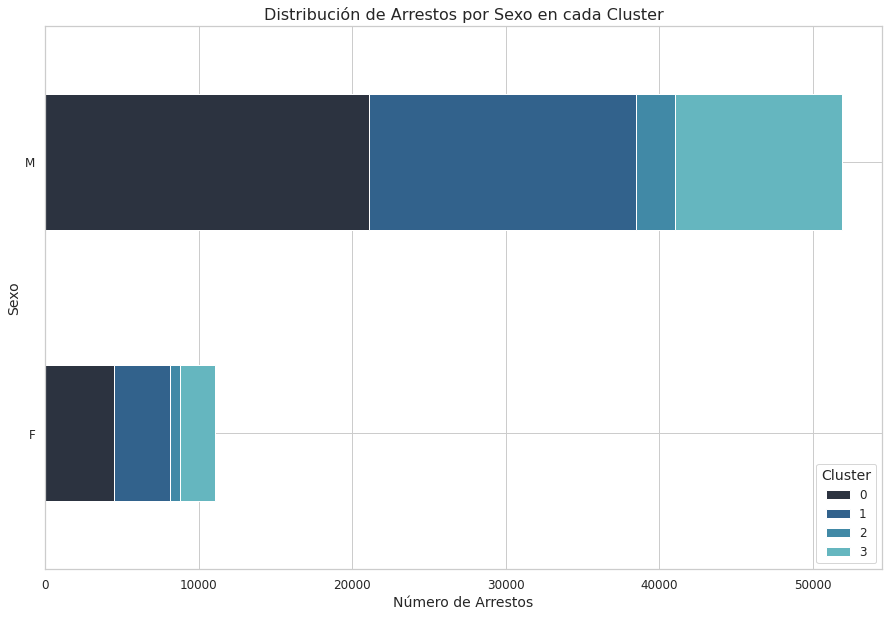

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por cluster y sexo
sex_distribution = cluster_assignments.groupBy("prediction", "PERP_SEX").count()

# Convertir a Pandas DataFrame
sex_distribution_pd = sex_distribution.toPandas()

# Pivotar el DataFrame para facilitar la creación de las barras apiladas
sex_distribution_pivot = sex_distribution_pd.pivot(index='PERP_SEX', columns='prediction', values='count').fillna(0)

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6', '#65B6BF']

# Crear gráfica con Seaborn
plt.figure(figsize=(15, 10))
ax = sex_distribution_pivot.plot(kind='barh', stacked=True, color=colors, figsize=(15, 10))

plt.xlabel('Número de Arrestos', fontsize=14)
plt.ylabel('Sexo', fontsize=14)
plt.title('Distribución de Arrestos por Sexo en cada Cluster', fontsize=16)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()



### Visualizamos por cada raza la distribución de los en los clusters

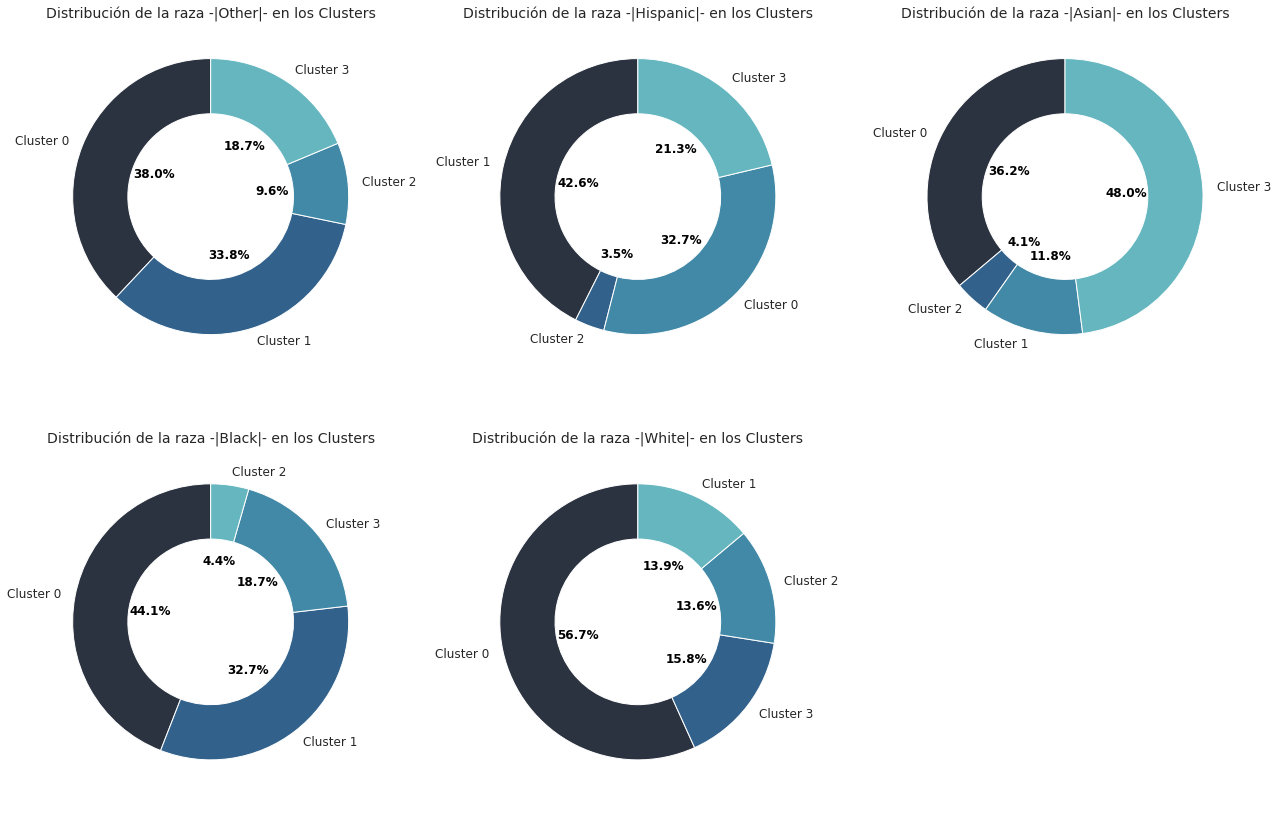

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribución de arrestos por raza
race_distribution = cluster_assignments.groupBy("PERP_RACE", "prediction").count()

# Convertir a Pandas DataFrame
race_distribution_pd = race_distribution.toPandas()

# Obtener todas las razas únicas
races = race_distribution_pd['PERP_RACE'].unique()

# Asignar colores específicos para cada cluster
colors = ['#2C3340', '#32628C', '#4189A6', '#65B6BF']

# Crear gráficos de pastel
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for idx, race in enumerate(races):
    row, col = divmod(idx, 3)
    race_data = race_distribution_pd[race_distribution_pd['PERP_RACE'] == race]
    wedges, texts, autotexts = axs[row, col].pie(
        race_data['count'], labels=[f'Cluster {i}' for i in race_data['prediction']], 
        autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.37, wedgeprops=dict(width=0.4)
    )
    
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        # Ajustar la posición de las etiquetas para que estén fuera del pastel
        x = autotext.get_position()[0] * 1.2
        y = autotext.get_position()[1] * 1.2
        autotext.set_position((x, y))

    axs[row, col].set_title(f'Distribución de la raza -|{race}|- en los Clusters', fontsize=14)

# Eliminar cualquier gráfico vacío
for ax in axs.flat[len(races):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
